In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

api_key="9338f5b5c34c36b3b435fc6f593244b2"

In [2]:
lat, lon = 18.60045034542101, 73.79717288999893
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

response = requests.get(api_url)
weather_data = response.json()

print("Response Keys:", weather_data.keys())
print("Forecast count:", len(weather_data.get("list", [])))


Response Keys: dict_keys(['cod', 'message'])
Forecast count: 0


In [3]:
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperatures = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

weather_df = pd.DataFrame({
    "Timestamp": timestamps,
    "Temperature": temperatures,
    "Humidity": humidity,
    "Wind_Speed": wind_speed,
    "Weather_Description": weather_description,
})

print(weather_df.head())

KeyError: 'list'

In [20]:
# STEP 4: Handle missing values + Convert Kelvin → Celsius

# Replace missing values with 0 (simple handling for now)
weather_df.fillna(0, inplace=True)

# Convert temperature from Kelvin to Celsius
weather_df["Temperature"] = weather_df["Temperature"].apply(lambda x: x - 273.15 if isinstance(x, (int, float)) else x)

# Set Timestamp as index
weather_df.set_index("Timestamp", inplace=True)

print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2025-09-10 06:00:00 to 2025-09-15 03:00:00
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind_Speed           40 non-null     float64
 3   Weather_Description  40 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB
None


In [21]:
# STEP 5: Analyze weather patterns (min, max, avg)

max_temp = weather_df["Temperature"].max()
min_temp = weather_df["Temperature"].min()
avg_temp = weather_df["Temperature"].mean()

print(f"Max Temp: {max_temp:.2f} °C")
print(f"Min Temp: {min_temp:.2f} °C")
print(f"Avg Temp: {avg_temp:.2f} °C")

Max Temp: 27.11 °C
Min Temp: 20.15 °C
Avg Temp: 22.22 °C


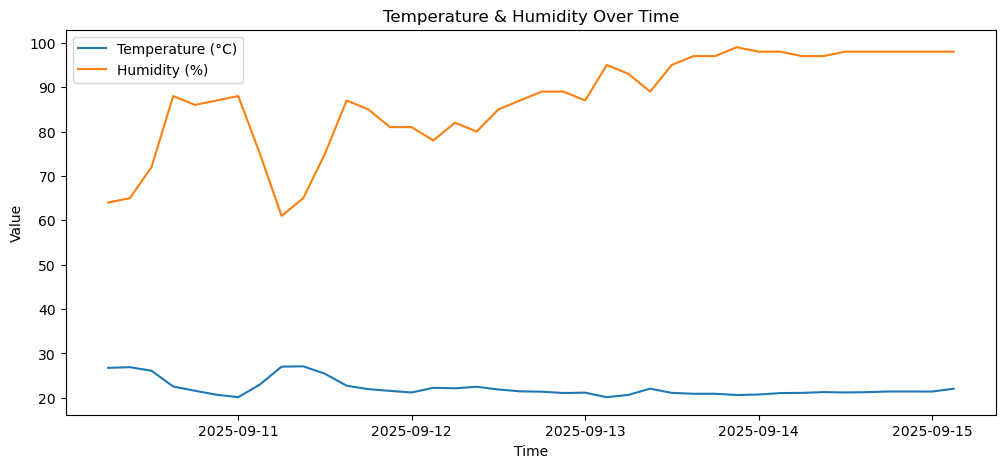

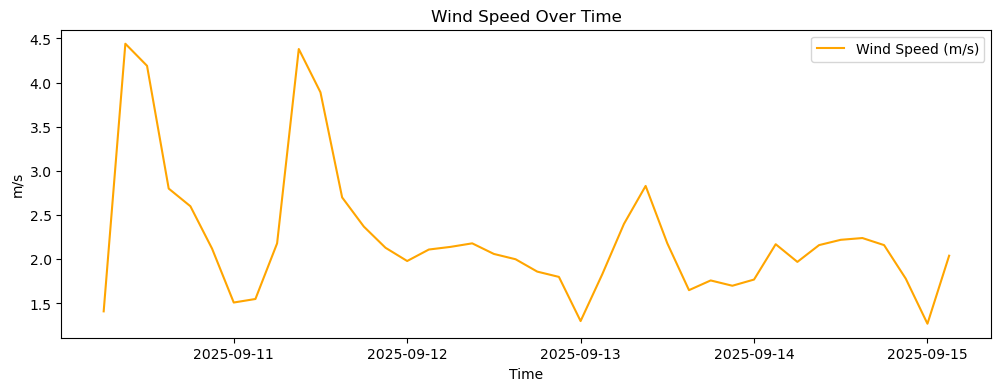

In [22]:
# STEP 6: Visualize data

plt.figure(figsize=(12,5))
plt.plot(weather_df.index, weather_df["Temperature"], label="Temperature (°C)")
plt.plot(weather_df.index, weather_df["Humidity"], label="Humidity (%)")
plt.title("Temperature & Humidity Over Time")
plt.xlabel("Time"); plt.ylabel("Value"); plt.legend(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(weather_df.index, weather_df["Wind_Speed"], label="Wind Speed (m/s)", color="orange")
plt.title("Wind Speed Over Time")
plt.xlabel("Time"); plt.ylabel("m/s"); plt.legend(); plt.show()

In [23]:
# STEP 7: Aggregate by Day

daily_summary = weather_df.resample("D").agg({
    "Temperature": ["mean", "min", "max"],
    "Humidity": "mean",
    "Wind_Speed": "mean"
})

print("Daily Summary:")
print(daily_summary)

Daily Summary:
           Temperature               Humidity Wind_Speed
                  mean    min    max     mean       mean
Timestamp                                               
2025-09-10   24.111667  20.71  26.92   77.000   2.926667
2025-09-11   23.632500  20.16  27.11   77.125   2.588750
2025-09-12   21.752500  21.10  22.50   83.875   2.016250
2025-09-13   20.966250  20.15  22.08   94.000   1.956250
2025-09-14   21.208750  20.76  21.44   97.750   2.058750
2025-09-15   21.745000  21.43  22.06   98.000   1.655000
